## Visualizing Middle Activations

### 加载训练好的模型：

In [1]:
from tensorflow.keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()

/Users/dongdongdongdong/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 15, 15, 128)      

### 预处理单张图像：

In [6]:
img_path = '/Users/dongdongdongdong/Desktop/dogs-vs-cats-small/test/cats/cat.1700.jpg'

# 将图像预处理为一个4D tensor
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
print(img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)
img_tensor /= 255.0

print(img_tensor.shape)

(150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)


### 显示测试图像：

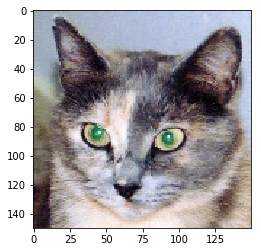

In [9]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

### 用一个input tensor和一个output tensor列表将模型实例化：

In [11]:
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers[: 8]] # 提取前8层的output
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # 创建一个模型，给定模型输入，可以返回这些输出

### 以predict模式运行模型：

In [12]:
activations = activation_model.predict(img_tensor)

In [15]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


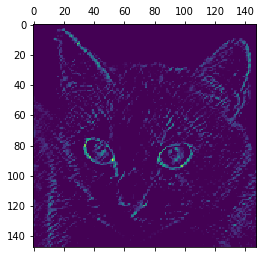

In [19]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()

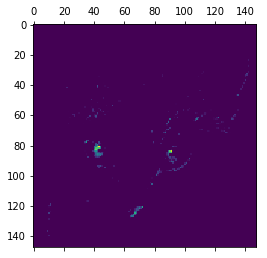

In [63]:
plt.matshow(first_layer_activation[0, :, :, 18], cmap='viridis')
plt.show()

### 将每个中间激活的所有通道可视化：

In [66]:
layer_names = []
for layer in model.layers[: 8]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # 显示特征图
    n_features = layer_activation.shape[-1] # 特征图中的特征个数
    
    size = layer_activation.shape[1] # 特征图的形状为(1, size, size, n_features)
    
    n_cols = n_features // images_per_row # 在该矩阵中将激活通道平铺
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -=  channel_image.mean()
            channel_image /=  channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
            scale = 1.0 / size
            plt.figure(figsize=(scale * display_grid.shape[1],
                                scale * display_grid.shape[0]))
            plt.title(layer_name)
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')

/Users/dongdongdongdong/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/dongdongdongdong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
plt.show()